import some of the library that we are going to use

In [379]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

load the csv file and look at the top 5 rows of the dataset

In [380]:
df=pd.read_csv("../Data/customer_segmentation.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [382]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

there are 28 columns but only the income has null values , so we are going to drop the rows with null values.

In [383]:
df.dropna(inplace=True)

In [384]:
df.isna().sum().sum()

np.int64(0)

In [385]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [386]:
df.duplicated().sum()

np.int64(0)

there is also no any duplicate value

In [387]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

there are some columns of object datatype so we are going to change them

In [388]:
df.Education.value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [389]:
df.replace({'Education': {'Graduation': 'Graduate', '2n Cycle': 'Post-Graduate'}}, inplace=True)

In [390]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

most of the customers are married follwed by together, single,divorced,widow,alone,absurd and yolo

In [391]:
df.Dt_Customer

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2216, dtype: object

we have to change the data type of date column to datetime

In [392]:
df.Dt_Customer=pd.to_datetime(df.Dt_Customer,dayfirst=True)

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

now most the feature has int data type only Education and Martial_Status have object that we are going to change in feature extracting through Encoding

feature extraction

In [394]:
df['age']=2025-df.Year_Birth

In [395]:
df['total_kids']=df.Kidhome+df.Teenhome

In [396]:
from sklearn.preprocessing import OneHotEncoder

In [397]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age,total_kids
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,68,0
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,71,2
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,60,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,41,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,44,1


In [398]:
df["total_spent"]=df.MntWines+df.MntFruits+df.MntMeatProducts+df.MntFishProducts+df.MntSweetProducts+df.MntGoldProds

In [399]:
df['customer_since_days']=(pd.Timestamp('today')-df.Dt_Customer).dt.days

now we have got four new feature age, total kids ,total_spent and customer_since_days

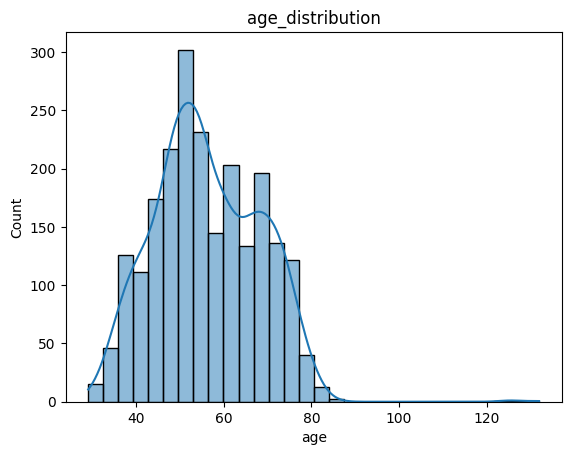

In [400]:
sns.histplot(df['age'],bins=30,kde=True)
plt.title("age_distribution")
plt.show()

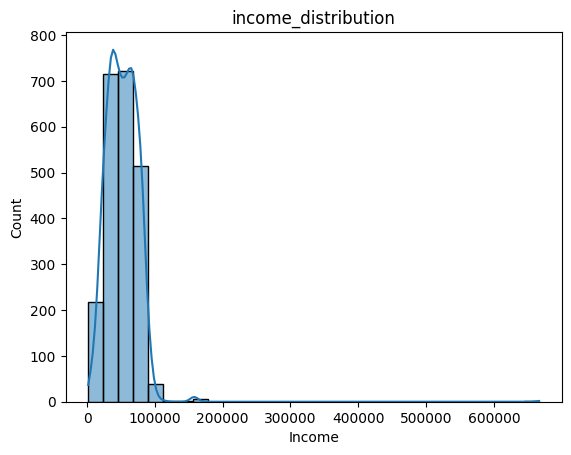

In [401]:
sns.histplot(df['Income'],bins=30,kde=True)
plt.title("income_distribution")
plt.show()

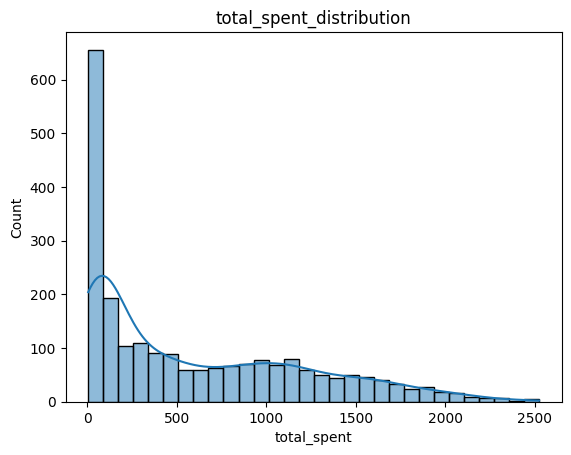

In [402]:
sns.histplot(df['total_spent'],bins=30,kde=True)
plt.title("total_spent_distribution")
plt.show()

<Axes: xlabel='total_kids', ylabel='Count'>

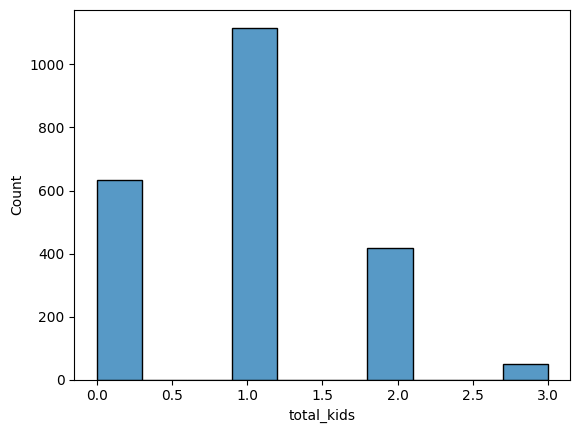

In [403]:
sns.histplot(df['total_kids'],bins=10,kde=False)

categorical analysis

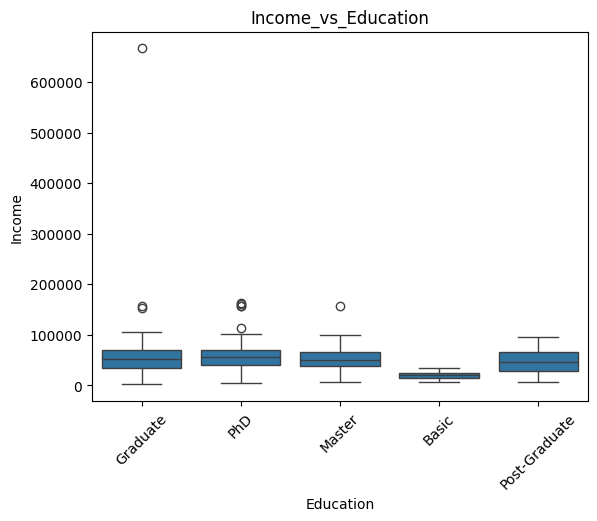

In [404]:
sns.boxplot(x='Education',y='Income',data=df)
plt.xticks(rotation=45)
plt.title("Income_vs_Education")
plt.show()

In [405]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'age', 'total_kids', 'total_spent', 'customer_since_days'],
      dtype='object')

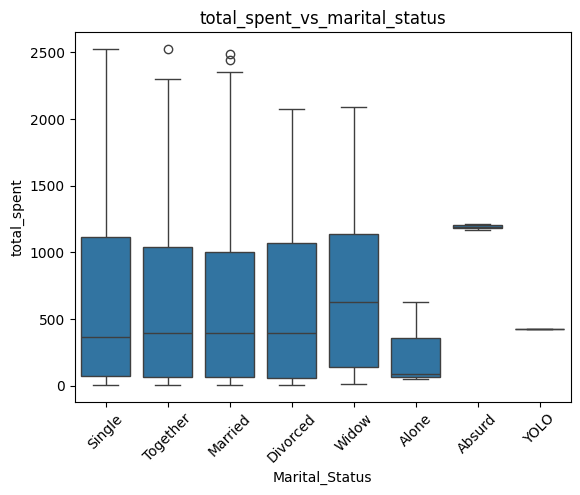

In [406]:
sns.boxplot(x="Marital_Status",y="total_spent",data=df)
plt.title("total_spent_vs_marital_status")
plt.xticks(rotation=45)
plt.show()

In [407]:
corr=df[["Income","age","Recency","total_spent","total_kids","customer_since_days"]].corr()

In [408]:
corr

,Income,age,Recency,total_spent,total_kids,customer_since_days
Income,1.000000,0.161791,-0.003970,0.667576,-0.293352,-0.018531
age,0.161791,1.000000,0.016295,0.113487,0.087398,-0.020305
Recency,-0.003970,0.016295,1.000000,0.020066,0.018290,0.025963
total_spent,0.667576,0.113487,0.020066,1.000000,-0.500244,0.158577
total_kids,-0.293352,0.087398,0.018290,-0.500244,1.000000,-0.025941
customer_since_days,-0.018531,-0.020305,0.025963,0.158577,-0.025941,1.000000


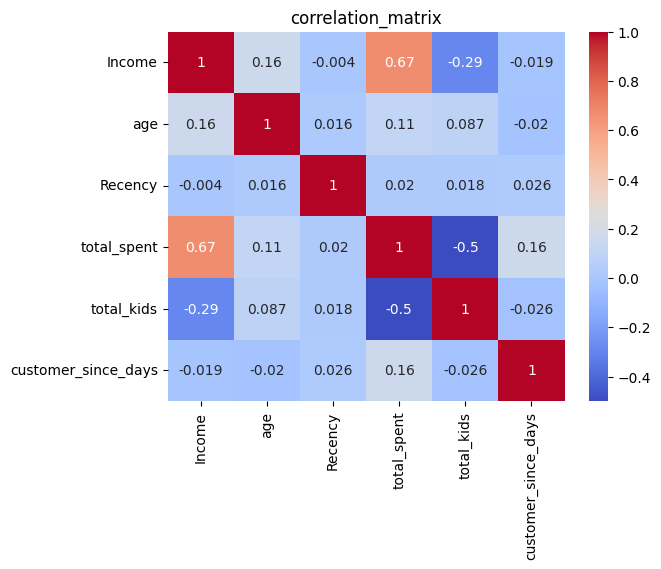

In [409]:
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("correlation_matrix")
plt.show()

In [410]:
pivot_income=df.pivot_table(values="Income",index="Education",columns="Marital_Status",aggfunc="mean")

In [411]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduate,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0
Post-Graduate,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN


Text(0.5, 1.0, 'Income_vs_Education_MaritalStatus')

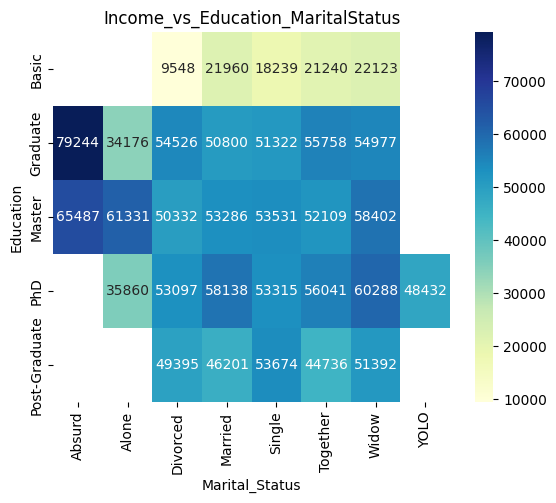

In [412]:
sns.heatmap(pivot_income,annot=True,cmap='YlGnBu',fmt=".0f")
plt.title("Income_vs_Education_MaritalStatus")

In [413]:
group1=df.groupby('Education')['total_spent'].mean().sort_values(ascending=False)
group1

Education
PhD              676.733888
Graduate         621.686380
Master           609.767123
Post-Graduate    494.930000
Basic             81.796296
Name: total_spent, dtype: float64

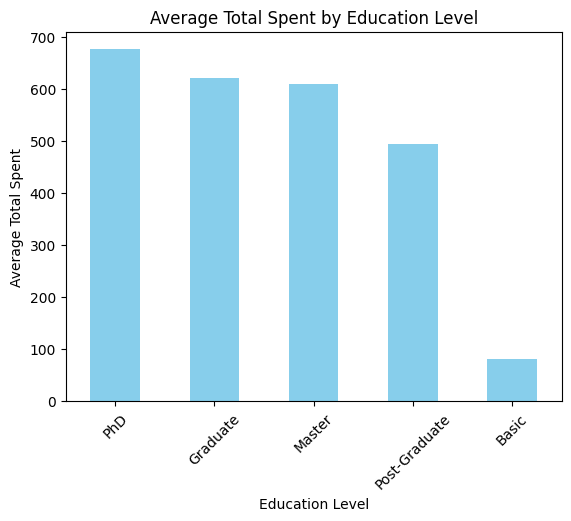

In [414]:
group1.plot(kind='bar'  ,color='skyblue')
plt.title("Average Total Spent by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Total Spent")
plt.xticks(rotation=45)
plt.show()

In [415]:
df["acceptedanyoffer"]=df[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum(axis=1)

In [416]:
df['acceptedanyoffer'].value_counts()

acceptedanyoffer
0    1611
1     369
2     139
3      51
4      36
5      10
Name: count, dtype: int64

In [417]:
df["acceptedanyoffer"]=df['acceptedanyoffer'].apply(lambda x: 1 if x>0 else 0)

In [418]:
group2=df.groupby('acceptedanyoffer')['total_spent'].mean()
group2

acceptedanyoffer
0    460.194289
1    998.191736
Name: total_spent, dtype: float64

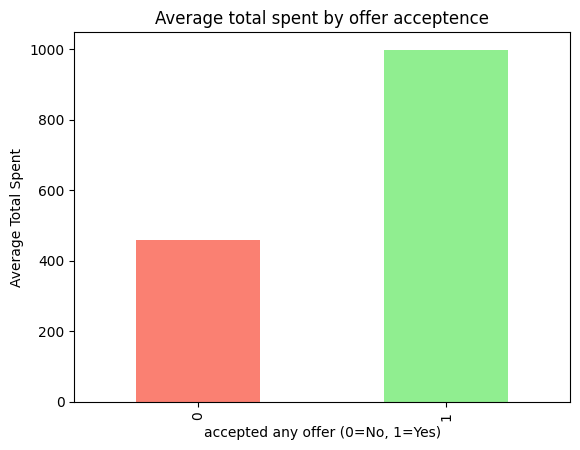

In [419]:
group2.plot(kind='bar',color=['salmon','lightgreen'])
plt.title("Average total spent by offer acceptence")
plt.xlabel('accepted any offer (0=No, 1=Yes)')
plt.ylabel('Average Total Spent')
plt.show()

In [420]:
group3=df.groupby('Marital_Status')['total_spent'].mean().sort_values(ascending=False)

In [421]:
group3

Marital_Status
Absurd      1192.500000
Widow        727.960526
Single       612.592357
Divorced     610.629310
Together     608.846422
Married      591.464411
YOLO         424.000000
Alone        256.666667
Name: total_spent, dtype: float64

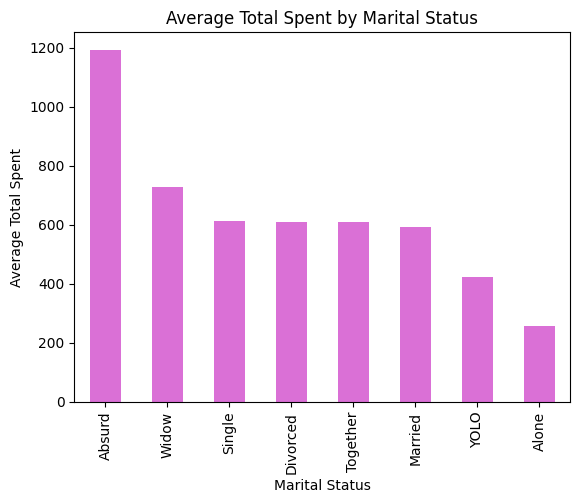

In [422]:
group3.plot(kind='bar',color='orchid')
plt.title("Average Total Spent by Marital Status")
plt.xlabel("Marital Status")    
plt.ylabel("Average Total Spent")
plt.show()

In [423]:
bins=[18,30,40,50,60,70,90]
labels=['18-29','30-39','40-49','50-59','60-69','70+']

In [424]:
df['agegroup']=pd.cut(df['age'],bins=bins,labels=labels)

In [425]:
df['agegroup']

0       60-69
1         70+
2       50-59
3       40-49
4       40-49
        ...  
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+
Name: agegroup, Length: 2216, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [426]:
group4=df.groupby('agegroup')['Income'].mean()

In [427]:
group4

agegroup
18-29    46658.000000
30-39    46283.028302
40-49    49224.877034
50-59    50812.913303
60-69    56200.827887
70+      58944.316294
Name: Income, dtype: float64

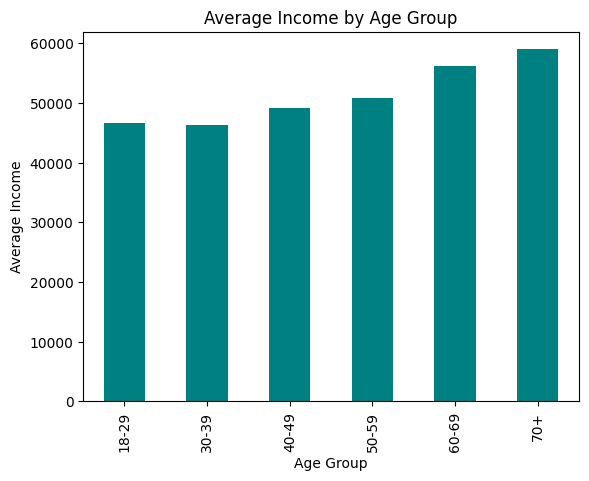

In [428]:
group4.plot(kind='bar',color='teal')
plt.title("Average Income by Age Group")
plt.xlabel("Age Group")     
plt.ylabel("Average Income")
plt.show()  

In [429]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,age,total_kids,total_spent,customer_since_days,acceptedanyoffer,agegroup
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,68,0,1617,4908,1,60-69
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,71,2,27,4358,0,70+
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,60,0,776,4557,0,50-59
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,41,1,53,4384,0,40-49
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,44,1,422,4406,0,40-49


In [430]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'age', 'total_kids', 'total_spent', 'customer_since_days',
       'acceptedanyoffer', 'agegroup'],
      dtype='object')

In [431]:
df['Education']

0       Graduate
1       Graduate
2       Graduate
3       Graduate
4            PhD
          ...   
2235    Graduate
2236         PhD
2237    Graduate
2238      Master
2239         PhD
Name: Education, Length: 2216, dtype: object

In [432]:
features=["age",'Income','total_spent','total_kids','Education','NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Recency']

In [433]:
eduction_map={
    'Basic':1,
    'Graduate':2,
    'Post-Graduate':3,
    'Master':4,
    'PhD':5
}

In [434]:
df['Education'] = df['Education'].map(eduction_map)

In [435]:
x=df[features].copy()

In [436]:
x

,age,Income,total_spent,total_kids,Education,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1617,0,2,8,10,4,7,58
1,71,46344.0,27,2,2,1,1,2,5,38
2,60,71613.0,776,0,2,8,2,10,4,26
3,41,26646.0,53,1,2,2,0,4,6,26
4,44,58293.0,422,1,5,5,3,6,5,94
...,...,...,...,...,...,...,...,...,...,...
2235,58,61223.0,1341,1,2,9,3,4,5,46
2236,79,64014.0,444,3,5,8,2,5,7,56
2237,44,56981.0,1241,0,2,2,3,13,6,91
2238,69,69245.0,843,1,4,6,5,10,3,8


In [437]:
x

,age,Income,total_spent,total_kids,Education,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1617,0,2,8,10,4,7,58
1,71,46344.0,27,2,2,1,1,2,5,38
2,60,71613.0,776,0,2,8,2,10,4,26
3,41,26646.0,53,1,2,2,0,4,6,26
4,44,58293.0,422,1,5,5,3,6,5,94
...,...,...,...,...,...,...,...,...,...,...
2235,58,61223.0,1341,1,2,9,3,4,5,46
2236,79,64014.0,444,3,5,8,2,5,7,56
2237,44,56981.0,1241,0,2,2,3,13,6,91
2238,69,69245.0,843,1,4,6,5,10,3,8


In [438]:
x.dtypes

age                      int64
Income                 float64
total_spent              int64
total_kids               int64
Education                int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Recency                  int64
dtype: object

In [439]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 

In [440]:
x_scaled=scaler.fit_transform(x)

In [441]:
x_scaled

array([[ 0.98644293,  0.2340627 ,  1.67548812, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.55414289,
         0.69323197, -0.31140528]], shape=(2216, 10))

In [442]:
from sklearn.cluster import KMeans
wcss=[]

In [443]:
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

In [444]:
wcss

[15293.436156031334,
 13684.009505428869,
 12654.68143489171,
 12113.91134304817,
 11528.327691651637,
 11000.227380489916,
 10645.371220464056,
 10268.772906168178]

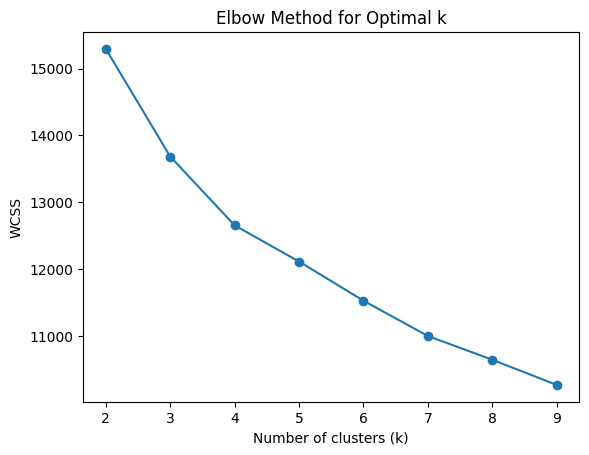

In [445]:
plt.plot(range(2,10),wcss,marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")    
plt.ylabel("WCSS")
plt.show()

In [446]:
kmeans=KMeans(n_clusters=6)
df["cluster"]=kmeans.fit_predict(x_scaled)
df["cluster"]

0       1
1       0
2       4
3       3
4       5
       ..
2235    4
2236    5
2237    1
2238    4
2239    2
Name: cluster, Length: 2216, dtype: int32

In [447]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,age,total_kids,total_spent,customer_since_days,acceptedanyoffer,agegroup,cluster
0,5524,1957,2,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,68,0,1617,4908,1,60-69,1
1,2174,1954,2,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,71,2,27,4358,0,70+,0
2,4141,1965,2,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,60,0,776,4557,0,50-59,4
3,6182,1984,2,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,41,1,53,4384,0,40-49,3
4,5324,1981,5,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,44,1,422,4406,0,40-49,5


In [448]:
df[features].dtypes

age                      int64
Income                 float64
total_spent              int64
total_kids               int64
Education                int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Recency                  int64
dtype: object

In [450]:
cluster_summary=df.groupby('cluster')[features].mean()

In [ ]:
cluster_summary

,age,Income,total_spent,total_kids,Education,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
cluster,,,,,,,,,,
0,50.841975,33053.486420,122.054321,1.091358,2.256790,2.293827,0.597531,3.414815,6.548148,23.340741
1,59.850543,42874.432065,163.073370,1.478261,4.611413,2.646739,0.907609,3.793478,6.160326,47.875000
2,52.569652,34555.303483,133.480100,1.226368,2.223881,2.445274,0.699005,3.445274,6.574627,75.815920
3,45.318352,80205.617978,1418.097378,0.142322,2.958801,4.606742,6.224719,8.460674,2.426966,49.670412
4,69.466216,73993.652027,1237.037162,0.239865,3.158784,4.631757,5.989865,8.128378,2.547297,50.192568
5,58.751046,61521.345188,915.025105,1.069038,3.182008,7.460251,3.403766,8.422594,5.905858,48.000000


In [451]:
df['cluster'].value_counts()

cluster
1    462
3    399
0    382
4    360
2    340
5    273
Name: count, dtype: int64

PCA visualization

In [452]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_data=pca.fit_transform(x_scaled)
df['pca1'],df['pca2']=pca_data[:,0],pca_data[:,1]

In [453]:
df['pca1']

0       2.304577
1      -1.844046
2       1.796090
3      -1.941854
4       0.132886
          ...   
2235    1.050941
2236   -0.472517
2237    1.393053
2238    1.937064
2239   -1.338266
Name: pca1, Length: 2216, dtype: float64

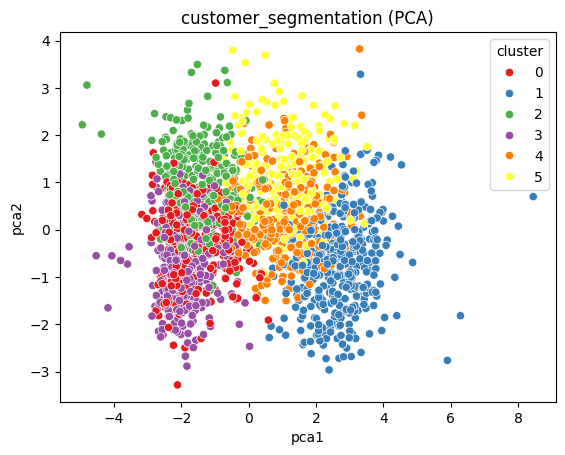

In [454]:
sns.scatterplot(x="pca1",y='pca2',hue="cluster",data=df,palette="Set1")
plt.title("customer_segmentation (PCA)")
plt.show()

Principal component Analysis (PCA) was applied to reduce the high dimensional feature space to two components for visualization purposes . The resulting 2D scatter plot ,colored by cluster labels helps visually assess cluster seperation and compactness .

In [457]:
cluster_summary

,age,Income,total_spent,total_kids,Education,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
cluster,,,,,,,,,,
0,53.931937,36196.175393,143.342932,1.280105,2.303665,2.549738,0.738220,3.575916,6.416230,78.159686
1,56.558442,79305.264069,1408.783550,0.095238,3.069264,4.445887,6.385281,8.313853,2.229437,52.121212
2,58.700000,41825.026471,133.658824,1.444118,4.629412,2.500000,0.767647,3.570588,6.191176,42.917647
3,49.573935,30262.293233,94.561404,1.075188,2.187970,2.080201,0.491228,3.100251,6.802005,27.436090
4,58.716667,62082.750000,847.822222,0.952778,2.608333,6.666667,3.419444,8.188889,5.225000,27.322222
5,61.853480,61058.549451,920.417582,1.109890,3.908425,7.124542,3.659341,8.238095,5.882784,70.695971
